Датасет представлен тремя файлами, расположенными в папке Data, которые содержат следующую информацию:
- **Injection wells.xlsx**, файл содержит информацию о нагнетательных скважинах, а именно их приемистость на каждый из дней, а также пластовое давление и размер штуцера для некоторых из них
- **Production_wells_train.xlsx**, файл содержит информацию о добывающих скважинах, объемы добытых жидкости и нефти, а также информацию по пластовым и забойным давлениям.
- **Well_coordinates.xlsx**, файл содержит информацию о координатах пластопересечений для всех скважин
- **Sample_submission.xlsx**, файл содержит пример того, как должен быть выведен прогноз по добыче с целью его последующей оценки

In [2]:
# imports
import pandas as pd
from path import Path
import missingno as msno

In [ ]:
path_to_raw_data = Path.joinpath("..",
    "data", "raw"
)

path_to_processed_data = Path.joinpath("..",
    "data", "processed"
)


In [3]:
df_inj = pd.read_excel(Path.joinpath(path_to_raw_data, "Injection_wells.xlsx"))
df_inj['group'] = 'I'
df_inj
#injection_wells[injection_wells["Well"] == 0].dropna()

,Well,Date,Injectivity,FormationPressure,Choke,group
0,0,1991-10-07,7.777000,NaN,NaN,I
1,0,1991-10-08,20.001000,NaN,NaN,I
2,0,1991-10-09,28.983000,NaN,NaN,I
3,0,1991-10-10,66.282000,NaN,NaN,I
4,0,1991-10-11,69.508000,NaN,NaN,I
...,...,...,...,...,...,...
122035,66,1999-11-06,204.056372,NaN,NaN,I
122036,66,1999-11-07,206.872818,NaN,6.0,I
122037,66,1999-11-08,206.595581,NaN,NaN,I
122038,66,1999-11-09,207.320831,NaN,NaN,I


In [4]:
df_prod = pd.read_excel(Path.joinpath(path_to_raw_data, "Production_wells_train.xlsx"))
df_prod['group'] = 'P'
df_prod

,Well,Date,Oil production rate,Liquid production rate,FormationPressure,BottomHolePressure,group
0,0,1987-03-09,47.923,49.001,NaN,57.0,P
1,0,1987-03-10,34.027,34.792,NaN,57.0,P
2,0,1987-03-11,44.988,46.000,NaN,66.0,P
3,0,1987-03-12,44.988,46.000,NaN,63.0,P
4,0,1987-03-13,44.988,46.000,NaN,61.0,P
...,...,...,...,...,...,...,...
24656,114,1991-06-05,11.593,186.999,226.0,223.0,P
24657,114,1991-06-06,11.593,186.999,226.0,223.0,P
24658,114,1991-06-07,11.593,186.999,226.0,223.0,P
24659,114,1991-06-08,10.213,187.707,226.0,224.0,P


In [5]:
df_prod["water"] = df_prod["Liquid production rate"] - df_prod["Oil production rate"]
df_prod["watercut"] = df_prod["water"] / df_prod["Liquid production rate"]

In [6]:
df = pd.concat([df_prod, df_inj])
df

,Well,Date,Oil production rate,Liquid production rate,FormationPressure,BottomHolePressure,group,water,watercut,Injectivity,Choke
0,0,1987-03-09,47.923,49.001,NaN,57.0,P,1.078,0.022000,NaN,NaN
1,0,1987-03-10,34.027,34.792,NaN,57.0,P,0.765,0.021988,NaN,NaN
2,0,1987-03-11,44.988,46.000,NaN,66.0,P,1.012,0.022000,NaN,NaN
3,0,1987-03-12,44.988,46.000,NaN,63.0,P,1.012,0.022000,NaN,NaN
4,0,1987-03-13,44.988,46.000,NaN,61.0,P,1.012,0.022000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
122035,66,1999-11-06,NaN,NaN,NaN,NaN,I,NaN,NaN,204.056372,NaN
122036,66,1999-11-07,NaN,NaN,NaN,NaN,I,NaN,NaN,206.872818,6.0
122037,66,1999-11-08,NaN,NaN,NaN,NaN,I,NaN,NaN,206.595581,NaN
122038,66,1999-11-09,NaN,NaN,NaN,NaN,I,NaN,NaN,207.320831,NaN


In [7]:
rename_dict = {"Well": "cat", "Date": "date", "Oil production rate": "oil", "Liquid production rate": "liquid",
              "FormationPressure" : "fp","BottomHolePressure" : "bhp", "Injectivity" : "water_inj", "Choke" : "choke"}
df.rename(columns=rename_dict, inplace=True)
df

,cat,date,oil,liquid,fp,bhp,group,water,watercut,water_inj,choke
0,0,1987-03-09,47.923,49.001,NaN,57.0,P,1.078,0.022000,NaN,NaN
1,0,1987-03-10,34.027,34.792,NaN,57.0,P,0.765,0.021988,NaN,NaN
2,0,1987-03-11,44.988,46.000,NaN,66.0,P,1.012,0.022000,NaN,NaN
3,0,1987-03-12,44.988,46.000,NaN,63.0,P,1.012,0.022000,NaN,NaN
4,0,1987-03-13,44.988,46.000,NaN,61.0,P,1.012,0.022000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
122035,66,1999-11-06,NaN,NaN,NaN,NaN,I,NaN,NaN,204.056372,NaN
122036,66,1999-11-07,NaN,NaN,NaN,NaN,I,NaN,NaN,206.872818,6.0
122037,66,1999-11-08,NaN,NaN,NaN,NaN,I,NaN,NaN,206.595581,NaN
122038,66,1999-11-09,NaN,NaN,NaN,NaN,I,NaN,NaN,207.320831,NaN


<Axes: >

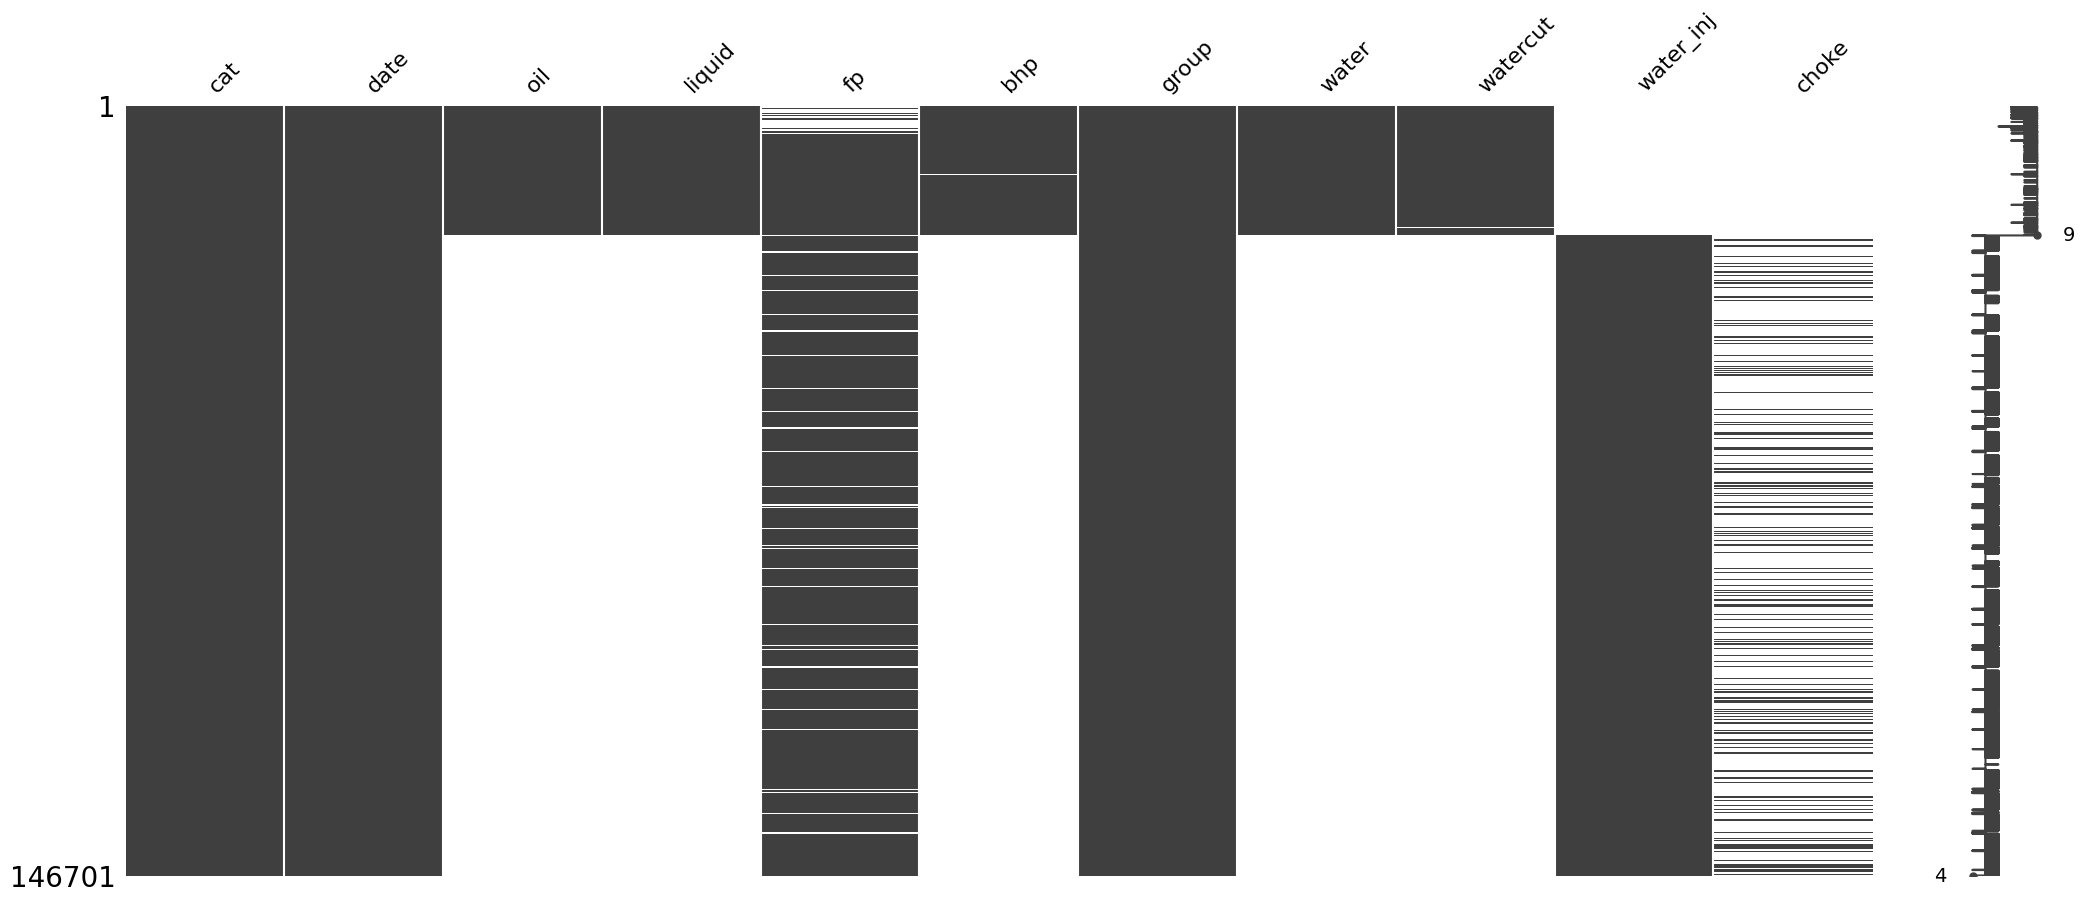

In [8]:
msno.matrix(df)

In [ ]:
path = Path.joinpath(
    path_to_processed_data,
    "well_data.csv",
)
df.to_csv(path, index=False)

In [ ]:
# # just rename sample's columns

# sample = pd.read_excel(Path.joinpath(path_to_raw_data, "Sample_submission.xlsx"))
# sample

,Well,Date,Oil production rate
0,0,1987-12-05,50
1,0,1987-12-06,50
2,0,1987-12-07,50
3,0,1987-12-08,50
4,0,1987-12-09,50
...,...,...,...
8094,114,1991-09-02,50
8095,114,1991-09-03,50
8096,114,1991-09-04,50
8097,114,1991-09-05,50


In [ ]:
# rename_dict = {"Well": "cat", "Date": "date", "Oil production rate": "oil"}
# sample.rename(columns=rename_dict, inplace=True)

# path = Path.joinpath(
#     path_to_processed_data,
#     "sample.csv",
# )
# sample.to_csv(path, index=False)

In [ ]:
# create coords dataframe

df_coords = pd.read_excel(Path.joinpath(path_to_raw_data, "Well_coordinates.xlsx"))
df_coords

,Well,X coordinate,Y coordinate
0,0,2026,6027
1,1,3025,6023
2,2,1518,5518
3,3,2516,5514
4,4,3530,5511
...,...,...,...
110,110,5506,998
111,111,2029,509
112,112,2996,514
113,113,4996,514


In [ ]:
df_coords['Well'].unique().size

115

In [ ]:
rename_dict = {"Well": "cat", "X coordinate": "x", "Y coordinate": "y"}
df_coords.rename(columns=rename_dict, inplace=True)

df_coords.head()

,cat,x,y
0,0,2026,6027
1,1,3025,6023
2,2,1518,5518
3,3,2516,5514
4,4,3530,5511


In [ ]:
path = Path.joinpath(
    path_to_processed_data,
    "coords.csv",
)
df_coords.to_csv(path, index=False)